<a href="https://colab.research.google.com/github/Kyle715-hk/EV-Adoption-Analysis-SDGs/blob/main/BSDS4999_Des_Ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/IEA Global EV Data 2024 2025-05-14 11_53_51.csv')

In [ ]:
max = df.max()['year']

In [ ]:
print(max)

2035


In [ ]:
min = df.min()['year']

In [ ]:
print(min)

2010


In [ ]:
print(df['parameter'].unique())

['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


In [ ]:
print(df['region'].unique())

['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Phalsten' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']


In [ ]:
print(df['mode'].unique())

['Cars' 'EV' 'Buses' 'Vans' 'Trucks']


In [ ]:
print(df['powertrain'].unique())

['EV' 'BEV' 'PHEV' 'Publicly available fast' 'Publicly available slow'
 'FCEV']


In [ ]:
print(df['year'].unique())

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2010
 2025 2030 2035]


EV Sales Share (%) for Cars in 2023 by Region:
mode                   Cars
region                     
Australia             12.00
Austria               26.00
Belgium               41.00
Brazil                 3.00
Bulgaria               5.80
Canada                13.00
Chile                  0.31
China                 38.00
Colombia               3.90
Costa Rica            12.00
Croatia                4.60
Cyprus                 8.80
Czech Republic         5.40
Denmark               46.00
EU27                  22.00
Estonia                8.80
Europe                21.00
Finland               54.00
France                25.00
Germany               24.00
Greece                14.00
Hungary               11.00
Iceland               71.00
India                  2.00
Ireland               27.00
Italy                  9.20
Japan                  3.60
Korea                  7.90
Latvia                11.00
Lithuania              7.50
Luxembourg            32.00
Mexico                 1.30
N

<ipython-input-2-844bdb376aa8>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aagr_sales_share = sales_share_cars.groupby('region').apply(calculate_aagr).reset_index(name='AAGR (%)')


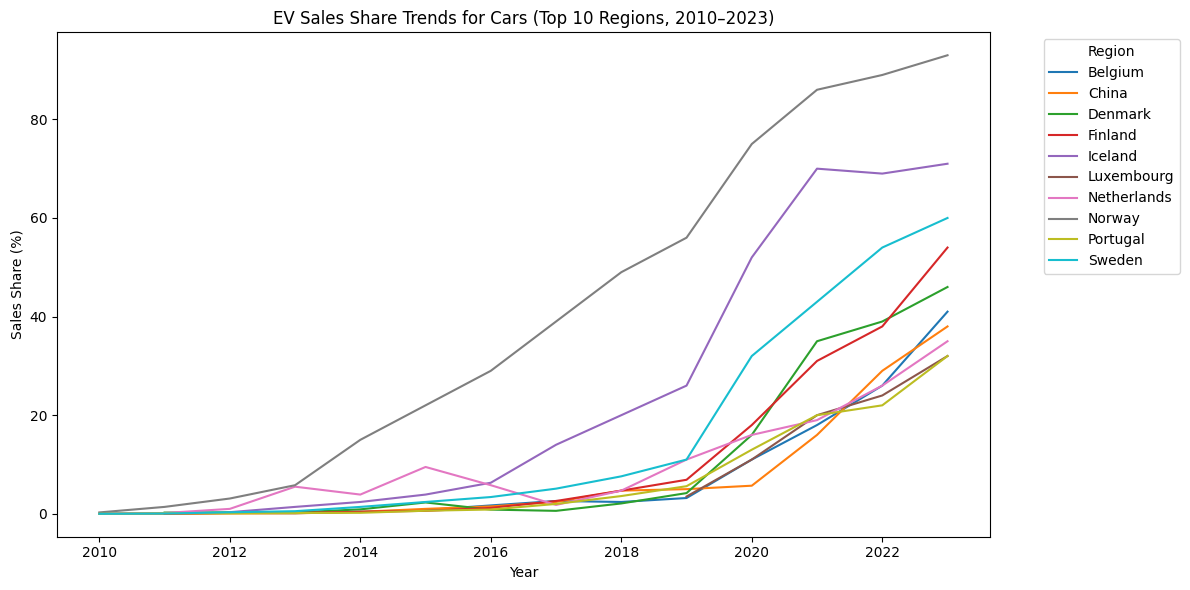

<Figure size 1200x600 with 0 Axes>

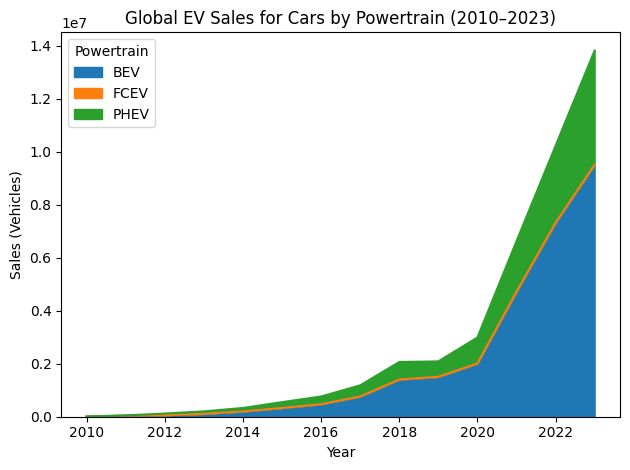

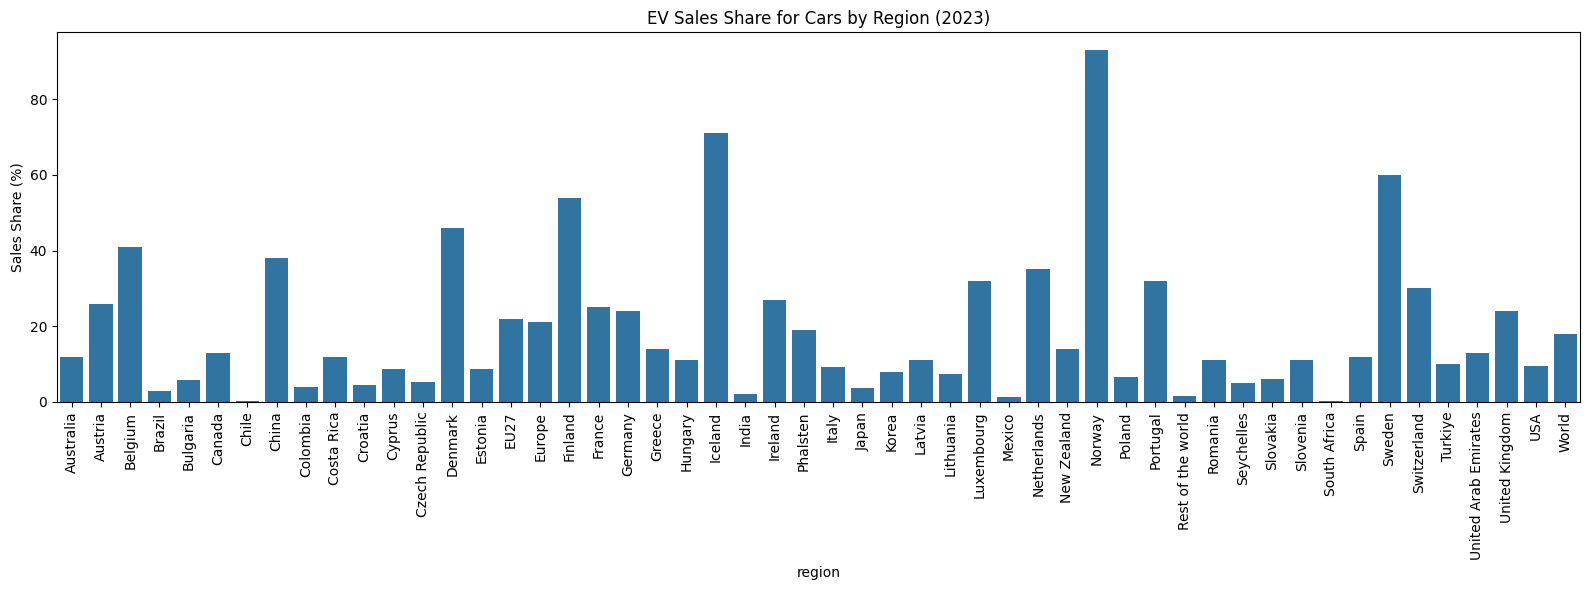

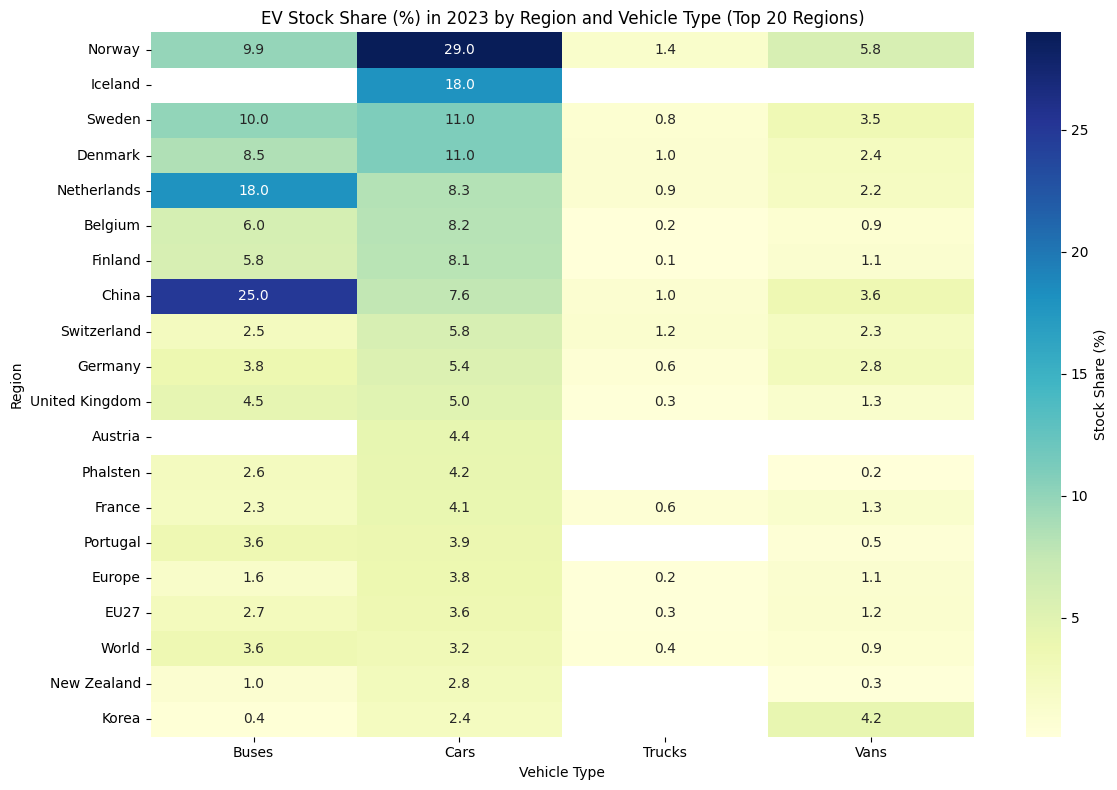

<ipython-input-2-844bdb376aa8>:127: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


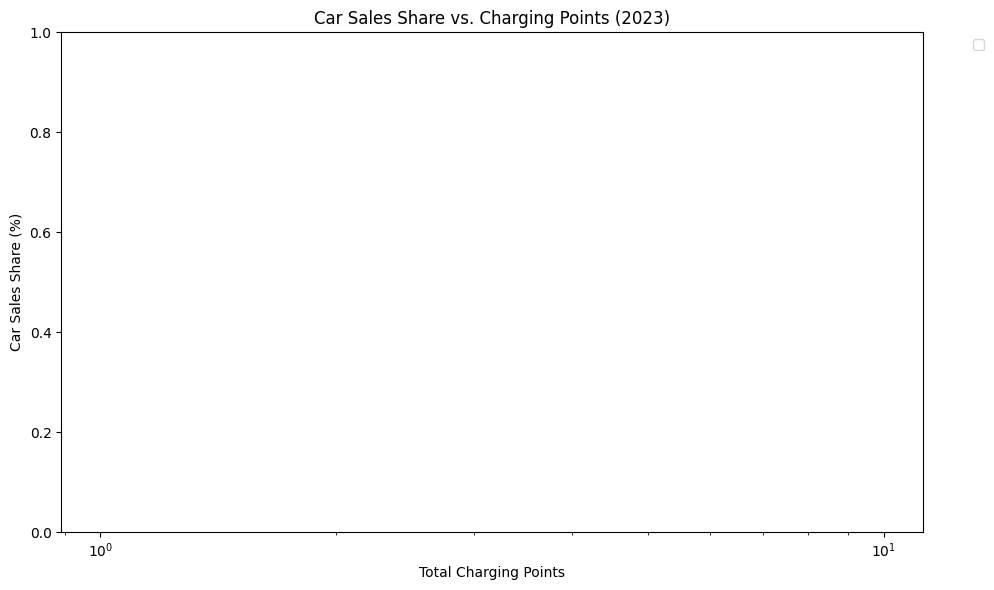

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('/content/IEA Global EV Data 2024 2025-05-14 11_53_51.csv')

# Filter for historical data (2010–2023)
df_hist = df[(df['category'] == 'Historical') & (df['year'].between(2010, 2023))]

# Summarize Sales Share and Stock Share (Cars)
sales_share_cars = df_hist[(df_hist['parameter'] == 'EV sales share') &
                          (df_hist['mode'] == 'Cars') & (df_hist['powertrain'] == 'EV')]
stock_share_cars = df_hist[(df_hist['parameter'] == 'EV stock share') &
                          (df_hist['mode'] == 'Cars') & (df_hist['powertrain'] == 'EV')]

# Pivot tables for 2023 (Cars)
df_2023 = df_hist[df_hist['year'] == 2023]
sales_share_2023_cars = df_2023[(df_2023['parameter'] == 'EV sales share') &
                                (df_2023['mode'] == 'Cars') & (df_2023['powertrain'] == 'EV')]
stock_share_2023_cars = df_2023[(df_2023['parameter'] == 'EV stock share') &
                                (df_2023['mode'] == 'Cars') & (df_2023['powertrain'] == 'EV')]
sales_share_pivot_2023 = sales_share_2023_cars.pivot_table(values='value', index='region', columns='mode', fill_value=np.nan)
stock_share_pivot_2023 = stock_share_2023_cars.pivot_table(values='value', index='region', columns='mode', fill_value=np.nan)

print("EV Sales Share (%) for Cars in 2023 by Region:")
print(sales_share_pivot_2023)
print("\nEV Stock Share (%) for Cars in 2023 by Region:")
print(stock_share_pivot_2023)

# Sales by Powertrain (Cars, 2010–2023)
sales_powertrain = df_hist[(df_hist['parameter'] == 'EV sales') & (df_hist['mode'] == 'Cars') &
                           (df_hist['powertrain'].isin(['BEV', 'PHEV', 'FCEV']))]
sales_powertrain_pivot = sales_powertrain.groupby(['region', 'year', 'powertrain'])['value'].sum().unstack(fill_value=0)

print("\nEV Sales (Vehicles) for Cars by Region, Year, and Powertrain (Sample):")
print(sales_powertrain_pivot.head(20))

# Calculate AAGR for Car Sales Share (2010–2023)
def calculate_aagr(group):
    start_year = group['year'].min()
    end_year = group['year'].max()
    start_value = group[group['year'] == start_year]['value'].iloc[0] if not group[group['year'] == start_year].empty else np.nan
    end_value = group[group['year'] == end_year]['value'].iloc[0] if not group[group['year'] == end_year].empty else np.nan
    if pd.notna(start_value) and pd.notna(end_value) and start_value > 0 and end_value > 0:
        years = end_year - start_year
        aagr = ((end_value / start_value) ** (1 / years) - 1) * 100
        return aagr
    return np.nan

aagr_sales_share = sales_share_cars.groupby('region').apply(calculate_aagr).reset_index(name='AAGR (%)')
print("\nAverage Annual Growth Rate (AAGR) for Car Sales Share (2010–2023):")
print(aagr_sales_share.sort_values(by='AAGR (%)', ascending=False))

# Non-Car Vehicle Types (2023)
sales_share_2023_all = df_2023[(df_2023['parameter'] == 'EV sales share') & (df_2023['powertrain'] == 'EV')]
stock_share_2023_all = df_2023[(df_2023['parameter'] == 'EV stock share') & (df_2023['powertrain'] == 'EV')]
sales_share_pivot_all = sales_share_2023_all.pivot_table(values='value', index='region', columns='mode', fill_value=np.nan)
stock_share_pivot_all = stock_share_2023_all.pivot_table(values='value', index='region', columns='mode', fill_value=np.nan)

print("\nEV Sales Share (%) in 2023 by Region and Vehicle Type:")
print(sales_share_pivot_all)
print("\nEV Stock Share (%) in 2023 by Region and Vehicle Type:")
print(stock_share_pivot_all)

# Visualization 1: Line Plot for Car Sales Share Trends (Top 10 Regions, 2010–2023)
top_regions = sales_share_2023_cars.sort_values('value', ascending=False)['region'].head(10).tolist()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_share_cars[sales_share_cars['region'].isin(top_regions)],
             x='year', y='value', hue='region')
plt.title('EV Sales Share Trends for Cars (Top 10 Regions, 2010–2023)')
plt.ylabel('Sales Share (%)')
plt.xlabel('Year')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('ev_sales_share_trends_cars_top10_2010_2023.png')
plt.show()

# Visualization 2: Stacked Area Plot for Global Car Sales by Powertrain (2010–2023)
world_sales = sales_powertrain[sales_powertrain['region'] == 'World']
world_sales_pivot = world_sales.pivot_table(values='value', index='year', columns='powertrain', fill_value=0)
plt.figure(figsize=(12, 6))
world_sales_pivot.plot(kind='area', stacked=True)
plt.title('Global EV Sales for Cars by Powertrain (2010–2023)')
plt.ylabel('Sales (Vehicles)')
plt.xlabel('Year')
plt.legend(title='Powertrain')
plt.tight_layout()
plt.savefig('ev_sales_powertrain_world_cars_2010_2023.png')
plt.show()

# Visualization 3: Bar Plot for Car Sales Share (2023, All Regions)
plt.figure(figsize=(16, 6))
sales_share_2023_melt = sales_share_2023_cars.melt(id_vars=['region'], value_vars=['value'],
                                                   var_name='Metric', value_name='Sales Share (%)')
sns.barplot(data=sales_share_2023_melt, x='region', y='Sales Share (%)')
plt.title('EV Sales Share for Cars by Region (2023)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('ev_sales_share_bar_cars_2023.png')
plt.show()

# Visualization 4: Heatmap for Stock Share (2023, Top 20 Regions, All Vehicle Types)
top_20_regions = stock_share_2023_cars.sort_values('value', ascending=False)['region'].head(20).tolist()
plt.figure(figsize=(12, 8))
sns.heatmap(stock_share_pivot_all.loc[top_20_regions], annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Stock Share (%)'})
plt.title('EV Stock Share (%) in 2023 by Region and Vehicle Type (Top 20 Regions)')
plt.ylabel('Region')
plt.xlabel('Vehicle Type')
plt.tight_layout()
plt.savefig('ev_stock_share_heatmap_2023.png')
plt.show()

# Visualization 5: Scatter Plot for Sales Share vs. Charging Points (2023, Cars)
chargers_2023 = df_2023[(df_2023['parameter'] == 'EV charging points') &
                        (df_2023['powertrain'] == 'EV') &
                        (df_2023['unit'].isin(['charging points']))]
chargers_2023_total = chargers_2023.groupby('region')['value'].sum().reset_index()
merged_data = sales_share_2023_cars.merge(chargers_2023_total, on='region', suffixes=('_sales', '_chargers'))
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='value_chargers', y='value_sales', hue='region', size='value_sales')
plt.title('Car Sales Share vs. Charging Points (2023)')
plt.xlabel('Total Charging Points')
plt.ylabel('Car Sales Share (%)')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('ev_sales_vs_chargers_2023.png')
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('IEA Global EV Data 2024 2025-05-14 11_53_51.csv')

# Group by 'region' and count unique values in 'mode' column
unique_modes_by_region = df.groupby('region')['mode'].nunique().reset_index(name='unique_mode_count')

# Print the result
print("Number of unique values in the 'mode' column grouped by 'region':")
print(unique_modes_by_region)

# Optionally, print the unique modes for each region
unique_modes_detail = df.groupby('region')['mode'].unique().reset_index(name='unique_modes')
print("\nUnique 'mode' values for each region:")
print(unique_modes_detail)

Number of unique values in the 'mode' column grouped by 'region':
                  region  unique_mode_count
0              Australia                  2
1                Austria                  2
2                Belgium                  5
3                 Brazil                  5
4               Bulgaria                  1
5                 Canada                  5
6                  Chile                  2
7                  China                  5
8               Colombia                  1
9             Costa Rica                  1
10               Croatia                  1
11                Cyprus                  1
12        Czech Republic                  1
13               Denmark                  5
14                  EU27                  5
15               Estonia                  1
16                Europe                  5
17               Finland                  5
18                France                  5
19               Germany                  5
20        

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('IEA Global EV Data 2024 2025-05-14 11_53_51.csv')

# Group by 'region' and count unique values in 'powertrain' column
unique_powertrain_by_region = df.groupby('region')['powertrain'].nunique().reset_index(name='unique_powertrain_count')

# Print the result
print("Number of unique values in the 'powertrain' column grouped by 'region':")
print(unique_powertrain_by_region)

# Optionally, print the unique modes for each region
unique_powertrain_detail = df.groupby('region')['powertrain'].unique().reset_index(name='unique_powertrain')
print("\nUnique 'powertrain' values for each region:")
print(unique_powertrain_detail)

Number of unique values in the 'powertrain' column grouped by 'region':
                  region  unique_powertrain_count
0              Australia                        6
1                Austria                        6
2                Belgium                        6
3                 Brazil                        6
4               Bulgaria                        3
5                 Canada                        6
6                  Chile                        6
7                  China                        6
8               Colombia                        3
9             Costa Rica                        2
10               Croatia                        3
11                Cyprus                        3
12        Czech Republic                        3
13               Denmark                        6
14                  EU27                        6
15               Estonia                        3
16                Europe                        6
17               Finland    